<a href="https://colab.research.google.com/github/chandan9t8/GraphAlignment/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch_geometric
!pip install node2vec

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv, GAE
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from node2vec import Node2Vec
import networkx as nx

In [ ]:
#dataset1

g1_edgelist = pd.read_csv('./drive/MyDrive/Data/g1_edgelist.csv',names=['node1','node2'])
g2_edgelist = pd.read_csv('./drive/MyDrive/Data/g2_edgelist.csv',names=['node1','node2'])

#Generate graphs from pandas dataframe
G1 = nx.from_pandas_edgelist(g1_edgelist, 'node1', 'node2')
G2 = nx.from_pandas_edgelist(g2_edgelist, 'node1', 'node2')

# Generate walks and train node2vec model
node2vec1 = Node2Vec(G1, dimensions=64, walk_length=50, num_walks=50, workers=4)
model1 = node2vec1.fit(window=10, min_count=1, batch_words=4)

node2vec2 = Node2Vec(G2, dimensions=64, walk_length=50, num_walks=50, workers=4)
model2 = node2vec2.fit(window=10, min_count=1, batch_words=4)

embeddings1 = {node: model1.wv[str(node)] for node in G1.nodes()}
embeddings2 = {node: model2.wv[str(node)] for node in G2.nodes()}

embeddings1_serializable = {node: embeddings1[node].tolist() for node in G1.nodes()}
embeddings2_serializable = {node: embeddings2[node].tolist() for node in G2.nodes()}

x1 = torch.tensor([embeddings1_serializable[node] for node in range(max(G1.nodes()) + 1)], dtype=torch.float)
x2 = torch.tensor([embeddings2_serializable[node] for node in range(max(G2.nodes()) + 1)], dtype=torch.float)

edge_index1 = torch.tensor(list(G1.edges), dtype=torch.long).t().contiguous()
edge_index2 = torch.tensor(list(G2.edges), dtype=torch.long).t().contiguous()

graph1_data = Data(x1, edge_index=edge_index1)
graph2_data = Data(x2, edge_index=edge_index2)

Computing transition probabilities:   0%|          | 0/4941 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Computing transition probabilities:   0%|          | 0/4941 [00:00<?, ?it/s]

In [ ]:
#dataset2

g1_edgelist_final = pd.read_csv('./drive/MyDrive/Data/g1_edgeListFinal.csv',names=['node1','node2'])
g2_edgelist_final = pd.read_csv('./drive/MyDrive/Data/g2_edgeListFinal.csv',names=['node1','node2'])

#Generate graphs from pandas dataframe
G1_final = nx.from_pandas_edgelist(g1_edgelist_final, 'node1', 'node2')
G2_final = nx.from_pandas_edgelist(g2_edgelist_final, 'node1', 'node2')

# Generate walks and train node2vec model
node2vec1_final = Node2Vec(G1_final, dimensions=64, walk_length=50, num_walks=50, workers=4)
model1_final = node2vec1_final.fit(window=10, min_count=1, batch_words=4)

node2vec2_final = Node2Vec(G2_final, dimensions=64, walk_length=50, num_walks=50, workers=4)
model2_final = node2vec2_final.fit(window=10, min_count=1, batch_words=4)

embeddings1_final = {node: model1.wv[str(node)] for node in G1.nodes()}
embeddings2_final = {node: model2.wv[str(node)] for node in G2.nodes()}

embeddings1_serializable_final = {node: embeddings1_final[node].tolist() for node in G1_final.nodes()}
embeddings2_serializable_final = {node: embeddings2_final[node].tolist() for node in G2_final.nodes()}

x1_final = torch.tensor([embeddings1_serializable_final[node] for node in range(max(G1_final.nodes()) + 1)], dtype=torch.float)
x2_final = torch.tensor([embeddings2_serializable_final[node] for node in range(max(G2_final.nodes()) + 1)], dtype=torch.float)

edge_index1_final = torch.tensor(list(G1_final.edges), dtype=torch.long).t().contiguous()
edge_index2_final = torch.tensor(list(G2_final.edges), dtype=torch.long).t().contiguous()

graph1_data_final = Data(x1_final, edge_index=edge_index1_final)
graph2_data_final = Data(x2_final, edge_index=edge_index2_final)

Computing transition probabilities:   0%|          | 0/2783 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Computing transition probabilities:   0%|          | 0/2783 [00:00<?, ?it/s]

In [ ]:
import json

# Store embeddings in a JSON file - dataset1
with open('embeddings64_g1.json', 'w') as f:
    json.dump(embeddings1_serializable, f)

with open('embeddings64_g2.json', 'w') as f:
    json.dump(embeddings2_serializable, f)

In [ ]:
# Reload embeddings from JSON file - dataset1
with open('embeddings64_g1.json', 'r') as f:
    embeddings1_serializable = json.load(f)

with open('embeddings64_g2.json', 'r') as f:
    embeddings2_serializable = json.load(f)

In [ ]:
# Store embeddings in a JSON file - dataset2
with open('embeddings64_g1_final.json', 'w') as f:
    json.dump(embeddings1_serializable_final, f)

with open('embeddings64_g2_final.json', 'w') as f:
    json.dump(embeddings2_serializable_final, f)

In [ ]:
# Reload embeddings from JSON file - dataset2
with open('embeddings64_g1_final.json', 'r') as f:
    embeddings1_serializable_final = json.load(f)

with open('embeddings64_g2_final.json', 'r') as f:
    embeddings2_serializable_final = json.load(f)

In [ ]:
#model

from torch_geometric.nn import GCNConv
import torch.nn.functional as F
import torch.nn as nn

class GNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(input_dim, 128)
        self.conv2 = GCNConv(128, output_dim)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

class SiameseNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SiameseNet, self).__init__()
        self.gnn = GNN(input_dim, output_dim)

    def forward(self, data1, data2):
        # Pass both graph data through the same GNN
        emb1 = self.gnn(data1.x, data1.edge_index)
        emb2 = self.gnn(data2.x, data2.edge_index)
        return emb1, emb2

In [ ]:
# Load anchors - dataset1
anchors = pd.read_csv('./drive/MyDrive/Data/map_anchors.csv')

# Convert to tensor
anchor_index = torch.tensor(anchors.values, dtype=torch.long)

In [ ]:
# Load anchors - dataset2
anchors_final = pd.read_csv('./drive/MyDrive/Data/mapping_anchorsFinal.csv')

# Convert to tensor
anchor_index_final = torch.tensor(anchors_final.values, dtype=torch.long)

In [ ]:
import torch.optim as optim

# Initialize model and optimizer
model1 = SiameseNet(input_dim=64, output_dim=32)
optimizer = optim.Adam(model1.parameters(), lr=0.0003)
loss_fn = nn.MSELoss()

In [ ]:
import matplotlib.pyplot as plt
def train(model, data1, data2, anchor_index, epochs, mapped_nodes_weight=1.0):
    loss_values = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        emb1, emb2 = model(data1, data2)

        # Compute MSE loss for all node pairs
        loss = loss_fn(emb1[anchor_index[:, 0]], emb2[anchor_index[:, 1]])

        # Penalty for already mapped nodes
        mapped_nodes_loss = loss_fn(emb1[anchor_index[:, 0]], emb2[anchor_index[:, 1]])

        # Total loss
        loss = loss + mapped_nodes_weight * mapped_nodes_loss

        loss.backward()
        optimizer.step()
        loss_values.append(loss.item())
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}: Loss {loss.item()}")

    # Plotting the loss values
    plt.figure(figsize=(10, 5))
    plt.plot(loss_values, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Cost vs Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

    return loss_values


Epoch 0: Loss 3.6169795989990234
Epoch 1000: Loss 0.011163334362208843
Epoch 2000: Loss 0.004062318243086338
Epoch 3000: Loss 0.0020026436541229486
Epoch 4000: Loss 0.0011010067537426949
Epoch 5000: Loss 0.0006380649865604937
Epoch 6000: Loss 0.00037616246845573187
Epoch 7000: Loss 0.00022691299091093242
Epoch 8000: Loss 0.00013763400784227997
Epoch 9000: Loss 8.559944399166852e-05
Epoch 10000: Loss 5.5554879509145394e-05
Epoch 11000: Loss 3.91667454096023e-05
Epoch 12000: Loss 2.76536047749687e-05
Epoch 13000: Loss 1.8195760276285e-05
Epoch 14000: Loss 1.4442261999647599e-05
Epoch 15000: Loss 1.3078187294013333e-05
Epoch 16000: Loss 8.35992341308156e-06
Epoch 17000: Loss 8.027822332223877e-06
Epoch 18000: Loss 6.3428401517739985e-06
Epoch 19000: Loss 5.632146439893404e-06


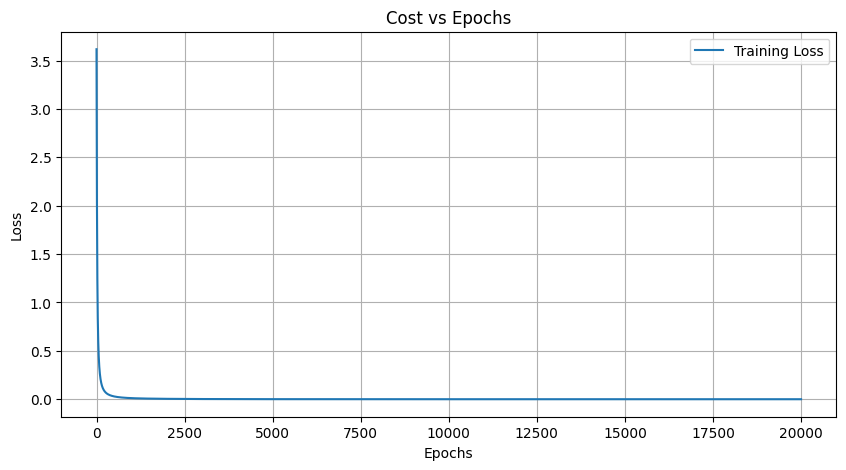

In [ ]:
loss_values = train(model1, graph1_data, graph2_data, anchor_index, epochs=20000, mapped_nodes_weight=10.0)

In [ ]:
# Initialize model and optimizer
model2 = SiameseNet(input_dim=64, output_dim=32)
optimizer = optim.Adam(model2.parameters(), lr=0.0003)
loss_fn = nn.MSELoss()

Epoch 0: Loss 2.0362181663513184
Epoch 1000: Loss 0.010756740346550941
Epoch 2000: Loss 0.0037098946049809456
Epoch 3000: Loss 0.001726489863358438
Epoch 4000: Loss 0.0008974890224635601
Epoch 5000: Loss 0.0004929076530970633
Epoch 6000: Loss 0.0002737657923717052
Epoch 7000: Loss 0.00015331682516261935
Epoch 8000: Loss 8.450391032965854e-05
Epoch 9000: Loss 4.6856999688316137e-05
Epoch 10000: Loss 2.7017085812985897e-05
Epoch 11000: Loss 1.588820305187255e-05
Epoch 12000: Loss 1.1017180440830998e-05
Epoch 13000: Loss 6.1838850342610385e-06
Epoch 14000: Loss 4.096823431609664e-06
Epoch 15000: Loss 3.0001260711287614e-06
Epoch 16000: Loss 2.3948168745846488e-06
Epoch 17000: Loss 1.4354956192619284e-06
Epoch 18000: Loss 2.60769820670248e-06
Epoch 19000: Loss 8.549653216505249e-07


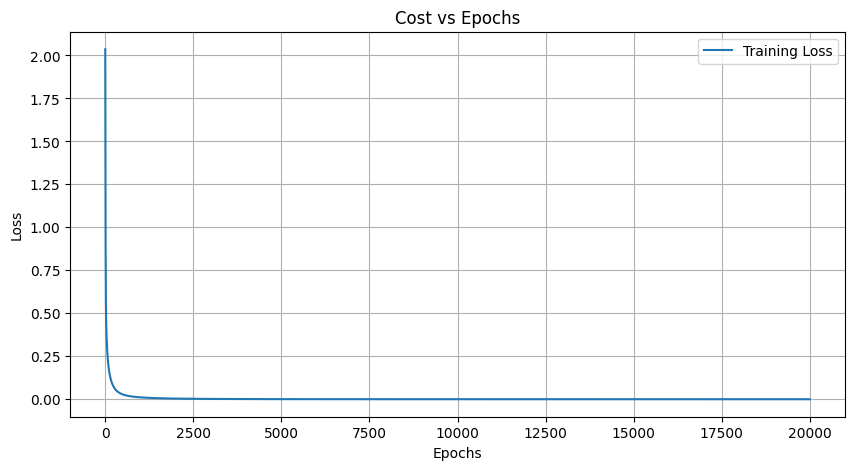

In [ ]:
loss_values = train(model2, graph1_data_final, graph2_data_final, anchor_index_final, epochs=20000, mapped_nodes_weight=10.0)

In [ ]:
def predict_correspondences(model, data1, data2):
    model.eval()
    with torch.no_grad():
        emb1, emb2 = model(data1, data2)

    # Normalize embeddings to unit vectors for cosine similarity
    emb1 = F.normalize(emb1, p=2, dim=1)
    emb2 = F.normalize(emb2, p=2, dim=1)

    # Compute cosine similarity and predict correspondences
    similarity = torch.matmul(emb1, emb2.t())
    predicted_correspondences = similarity.argmax(dim=1)

    # Create a dictionary mapping each node in graph1 to a node in graph2
    correspondence_dict = {i: predicted_correspondences[i].item() for i in range(data1.num_nodes)}

    return correspondence_dict

In [ ]:
predicted_correspondences1 = predict_correspondences(model1, graph1_data, graph2_data)

In [ ]:
import csv

with open('Node_mappings_final1.csv', 'w', newline='') as csvfile:
    fieldnames = ['g1', 'g2']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for node_g1, node_g2 in predicted_correspondences1.items():
        writer.writerow({'g1': node_g1, 'g2': node_g2})

In [ ]:
predicted_correspondences2 = predict_correspondences(model2, graph1_data_final, graph2_data_final)

In [ ]:
import csv

with open('Node_mappings_final2.csv', 'w', newline='') as csvfile:
    fieldnames = ['g1', 'g2']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for node_g1, node_g2 in predicted_correspondences2.items():
        writer.writerow({'g1': node_g1, 'g2': node_g2})